<img src="https://raw.githubusercontent.com/harmonize-tools/socio4health/main/docs/source/_static/image%20(1).png" alt="image info" height="215" width="215"/><img src="https://raw.githubusercontent.com/harmonize-tools/socio4health/main/docs/source/_static/image.png" alt="image info" height="100" width="100"/>




# Extraction of Colombia, Brazil and Peru online data

**Run the tutorial via free cloud platforms:** [![badge](https://img.shields.io/badge/launch-binder-E66581.svg?logo=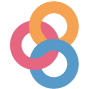)](https://github.com/harmonize-tools/socio4health/blob/main/docs/source/notebooks/extractor.ipynb) <a target="_blank" href="https://colab.research.google.com/github/harmonize-tools/socio4health/blob/main/docs/source/notebooks/extractor.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



This notebook provides you with an introduction on how to retrieve data from online data sources through web scraping, as well as from local files from Colombia, Brazil, Peru, and the Dominican Republic. This tutorial assumes you have an intermediate or advanced understanding of Python and data manipulation.

## Prerequisites

To run this notebook, you need to have the following prerequisites:

- Python 3.10+

Additionally, you need to install the `socio4health` and `pandas` package, which can be done using ``pip``:



In [2]:
!pip install socio4health pandas -q

## Import Libraries

To perform the data extraction, the `socio4health` library provides the `Extractor` class for data extraction, and the `Harmonizer` class for data harmonization of the retrieved date. We will also use `pandas` for data manipulation.

Brazilian data is extracted using the `BraColnamesEnum` and `BraColspecsEnum` enums, which define the column names and specifications for Brazilian data [See `socio4health.enums.data_info_enum` for more details](https://harmonize-tools.github.io/socio4health/socio4health.enums.html#module-socio4health.enums.data_info_enum)

In [3]:
import datetime
import pandas as pd
from socio4health import Extractor
from socio4health.enums.data_info_enum import BraColnamesEnum, BraColspecsEnum
from socio4health.harmonizer import Harmonizer
from socio4health.utils import harmonizer_utils

## Use case 1: Extracting data from Colombia

To extract data from Colombia, we will use the `Extractor` class from the `socio4health` library. The `Extractor` class provides methods to retrieve data from various sources, including online databases and local files. In this example, we will extract the Large Integrated Household Survey - GEIH - 2022 (Gran Encuesta Integrada de Hogares - GEIH - 2022) dataset  from the Colombian Nacional Administration of Statistics (**DANE**) website

The `Extractor` class requires the following parameters:
- `input_path`: The URL or local path to the data source.
- `down_ext`: A list of file extensions to download. This can include `.CSV`, `.csv`, `.zip`, etc.
- `sep`: The separator used in the data files (e.g., `;` for semicolon-separated values).
- `output_path`: The local path where the extracted data will be saved.
- `depth`: The depth of the directory structure to traverse when downloading files. A depth of `0` means only the files in the specified directory will be downloaded.


In [4]:
col_online_extractor = Extractor(input_path="https://microdatos.dane.gov.co/index.php/catalog/771/get-microdata", down_ext=['.CSV','.csv','.zip'], sep=';', output_path="../data", depth=0)

## Use case 2: Extracting data from Brazil

We are downloading the Brazilian data from the Brazilian Institute of Geography and Statistics (**IBGE**) website. The `Extractor` class is used to download the data. In this case, we are extracting the Brazilian National Continuous Household Sample Survey (**PNADC**) for the year 2024. It is important to note that `Extractor` is using the `is_fwf` parameter set to `True`, which indicates that the data files are in fixed-width format. The `colnames` and `colspecs` parameters are set to the corresponding enums for Brazilian data, which define the column names and specifications for the dataset.

In [5]:
bra_online_extractor = Extractor(input_path="https://ftp.ibge.gov.br/Trabalho_e_Rendimento/Pesquisa_Nacional_por_Amostra_de_Domicilios_continua/Trimestral/Microdados/2024/", down_ext=['.txt','.zip'], is_fwf=True, colnames=BraColnamesEnum.PNADC.value, colspecs=BraColspecsEnum.PNADC.value, output_path="../data", depth=0)



## Use case 3: Extracting data from Peru

Peruvian data is extracted from the National Institute of Statistics and Informatics (**INEI**) website. In this case, we are extracting the National Household Survey (**ENAHO**) for the year 2022. The `down_ext` parameter is set to download `.csv` and `.zip` files, and the `sep` parameter is set to `;`, indicating that the data files are semicolon-separated values.

In [7]:
per_online_extractor = Extractor(input_path="https://www.inei.gob.pe/media/DATOS_ABIERTOS/ENAHO/DATA/2022.zip", down_ext=['.csv','.zip'], output_path="../data", depth=0)



## Further steps
* Harmonize the extracted data using the `Harmonizer` class from the `socio4health` library. You can follow the [Harmonization tutorial](https://harmonize-tools.github.io/socio4health/tutorials/harmonization.html) for more details on how to harmonize the data.